In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import zipfile

/var/folders/bc/ynvgg9rn14v5sl_jcp8x8_s40000gn/T/ipykernel_33136/3631846044.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# open zipped dataset
with zipfile.ZipFile("data.zip") as z:
   # open the csv file in the dataset
   with z.open("data/HR_data.csv") as f:
       
      # read the dataset
      data = pd.read_csv(f, index_col=0)

num_cols = data.columns[:51] 
cat_cols = data.columns[51:]

missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data.sort_values(inplace=True)

missing_rows = data.isnull().any(axis=1)
missing_cols = missing_data.index

data[missing_rows][missing_cols]

,EDA_TD_P_RT,EDA_TD_P_ReT,attentive,afraid,active,inspired,determined
104,2.321429,1.892857,NaN,NaN,NaN,2.0,NaN
120,1.968750,2.703125,2.0,1.0,2.0,2.0,NaN
122,3.387500,2.367647,3.0,1.0,2.0,NaN,3.0
125,2.108696,1.911765,3.0,4.0,2.0,NaN,2.0
272,NaN,NaN,3.0,1.0,3.0,2.0,3.0


In [3]:
# Calculate mean of the column within the same Round, Phase, Puzzler and Cohort
means_for_missing = data.groupby(['Round', 'Phase', 'Puzzler', 'Cohort']).mean().reset_index()

# Replace missing values
for index, row in data.iterrows():
    if row.isnull().any():
        mean_row = means_for_missing[(means_for_missing['Round'] == row['Round']) 
                                     & (means_for_missing['Phase'] == row['Phase']) 
                                     & (means_for_missing['Puzzler'] == row['Puzzler']) 
                                     & (means_for_missing['Cohort'] == row['Cohort'])]
        
        # only replace the values that are missing
        for col in row[row.isnull()].index:
            # round the questionnaire values
            if col in ['attentive', 'afraid', 'active', 'inspired', 'determined']:
                data.at[index, col] = np.round(mean_row[col].values[0])
            else:
                data.at[index, col] = mean_row[col].values[0]

# Check that it works as expected
data[missing_rows][missing_cols]

,EDA_TD_P_RT,EDA_TD_P_ReT,attentive,afraid,active,inspired,determined
104,2.321429,1.892857,3.0,1.0,2.0,2.0,3.0
120,1.968750,2.703125,2.0,1.0,2.0,2.0,2.0
122,3.387500,2.367647,3.0,1.0,2.0,2.0,3.0
125,2.108696,1.911765,3.0,4.0,2.0,2.0,2.0
272,2.557692,2.409091,3.0,1.0,3.0,2.0,3.0


In [19]:
data['Cohort'] = data['Cohort'].apply(lambda x: 'D1_3' if x in ['D1_4', 'D1_5', 'D1_6'] else x)

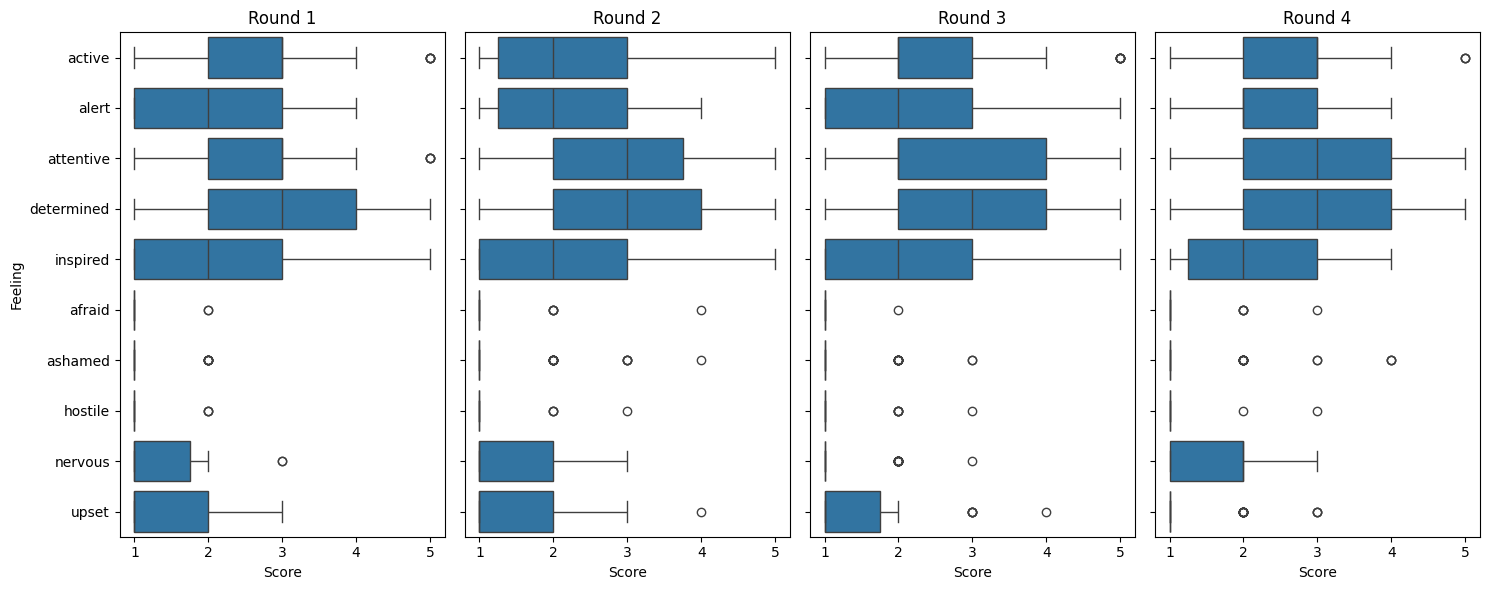

In [11]:
feelings = ['active', 'alert', 'attentive', 'determined', 'inspired', 'afraid', 'ashamed', 'hostile', 'nervous', 'upset']
# make a seaborn boxplot of each feeling for each round

fig, axs = plt.subplots(1,4, figsize=(15,6), sharey=True)

# Each subplot represents a round. Have score on the x-axis and feeling in the y-axis and show horizontal boxplot for each feeling
for i, round_num in enumerate(data['Round'].unique()):
    #sns.boxplot(data=data[data['Round'] == round_num][feelings], ax=axs[i])
    sns.boxplot(x = 'value', y = 'variable', data = pd.melt(data[data['Round'] == round_num][feelings]), ax=axs[i])
    axs[i].set_title(f'Round {i+1}')
    axs[i].set_ylabel('Feeling')
    axs[i].set_xlabel('Score')

plt.tight_layout()

plt.show()


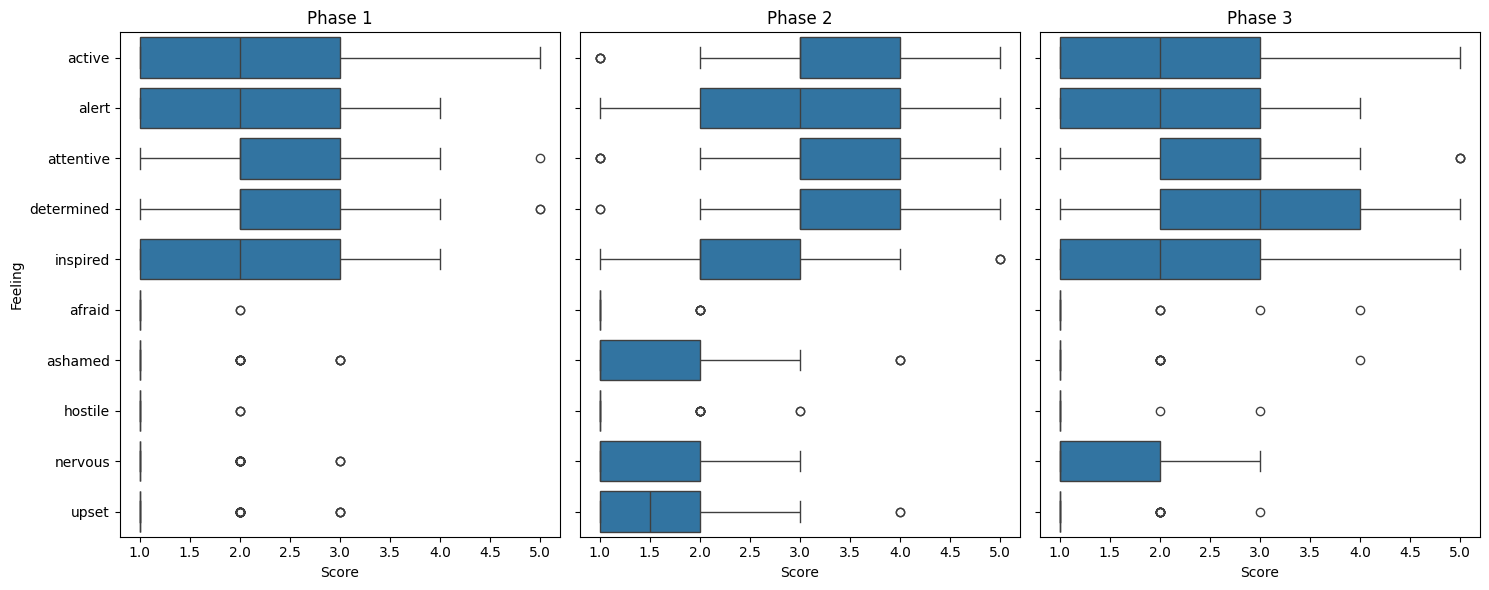

In [12]:
feelings = ['active', 'alert', 'attentive', 'determined', 'inspired', 'afraid', 'ashamed', 'hostile', 'nervous', 'upset']
# make a seaborn boxplot of each feeling for each round

fig, axs = plt.subplots(1,3, figsize=(15,6), sharey=True)

# Each subplot represents a round. Have score on the x-axis and feeling in the y-axis and show horizontal boxplot for each feeling
for i, phase_num in enumerate(data['Phase'].unique()):
    #sns.boxplot(data=data[data['Round'] == round_num][feelings], ax=axs[i])
    sns.boxplot(x = 'value', y = 'variable', data = pd.melt(data[data['Phase'] == phase_num][feelings]), ax=axs[i])
    axs[i].set_title(f'Phase {i+1}')
    axs[i].set_ylabel('Feeling')
    axs[i].set_xlabel('Score')

plt.tight_layout()

plt.show()

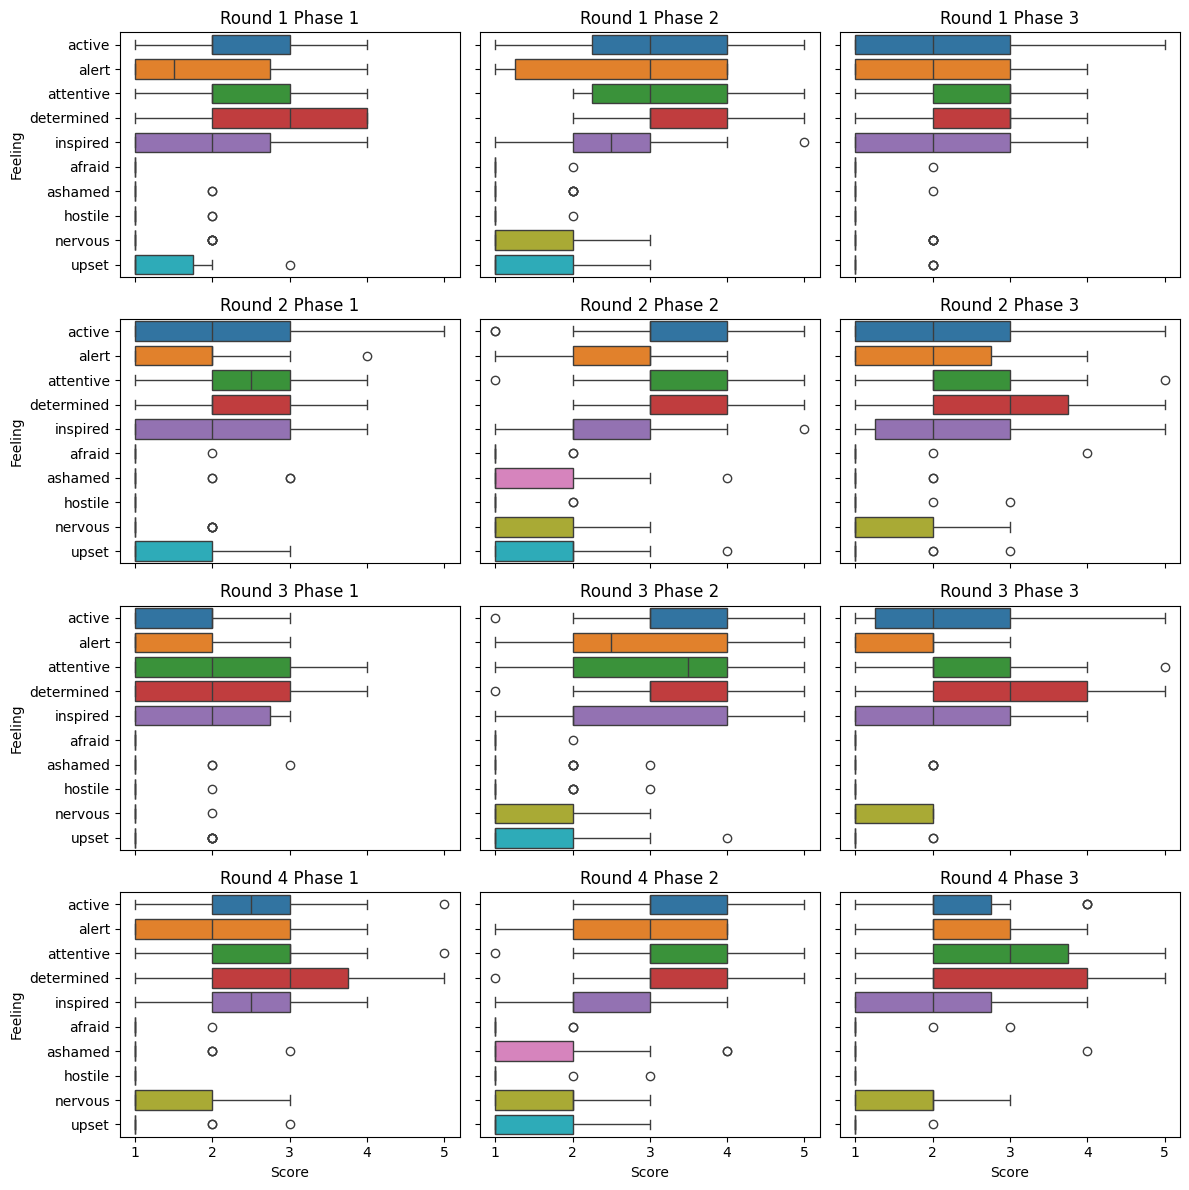

In [18]:
fig, axs = plt.subplots(4,3, figsize=(12,12), sharey=True, sharex=True)

for i, round_num in enumerate(data['Round'].unique()):
    for j, phase_num in enumerate(data['Phase'].unique()):
        sns.boxplot(x = 'value', y = 'variable', data = pd.melt(data[(data['Round'] == round_num) & (data['Phase'] == phase_num)][feelings]), ax=axs[i,j], hue='variable')
        axs[i,j].set_title(f'Round {i+1} Phase {j+1}')
        axs[i,j].set_ylabel('Feeling')
        axs[i,j].set_xlabel('Score')
        # color by feeling


plt.tight_layout()

plt.show()

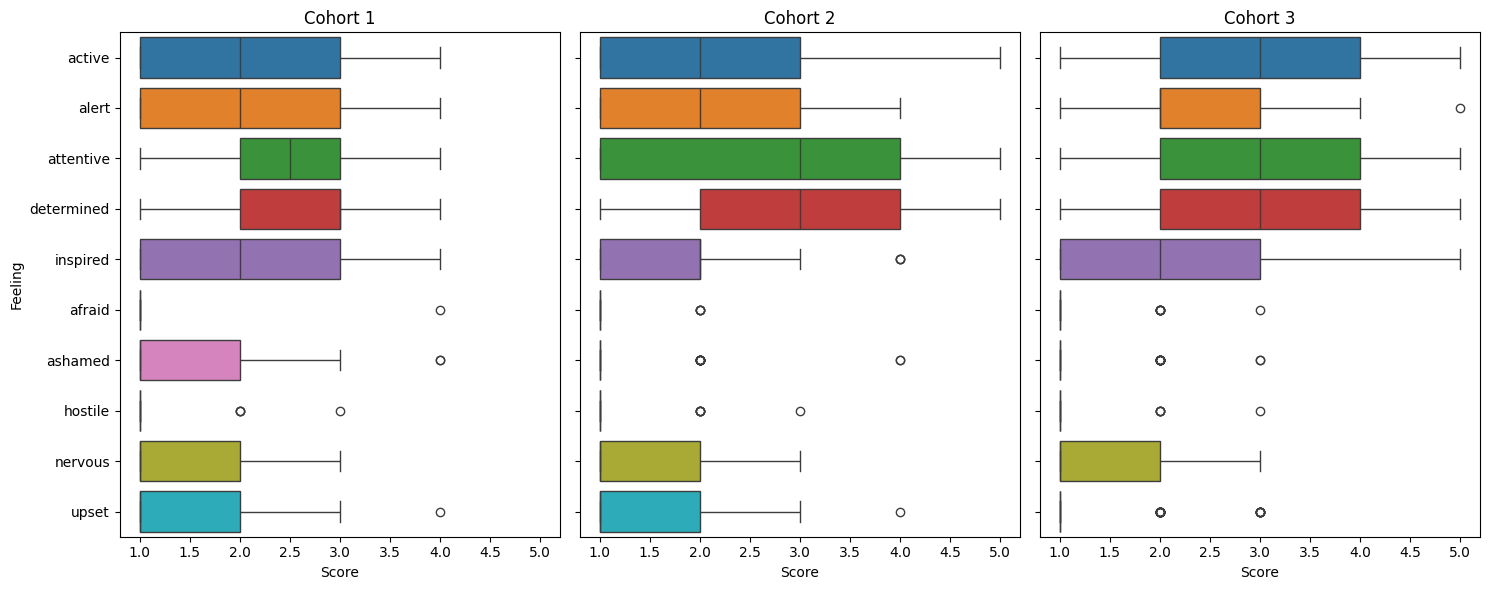

In [69]:
# make a seaborn boxplot of each feeling for each round

fig, axs = plt.subplots(1,3, figsize=(15,6), sharey=True, sharex=True)

# Each subplot represents a round. Have score on the x-axis and feeling in the y-axis and show horizontal boxplot for each feeling
for i, cohort_num in enumerate(data['Cohort'].unique()):
    #sns.boxplot(data=data[data['Round'] == round_num][feelings], ax=axs[i])
    sns.boxplot(x = 'value', y = 'variable', data = pd.melt(data[data['Cohort'] == cohort_num][feelings]), ax=axs[i], hue='variable')
    axs[i].set_title(f'Cohort {i+1}')
    axs[i].set_ylabel('Feeling')
    axs[i].set_xlabel('Score')

plt.tight_layout()

plt.show()

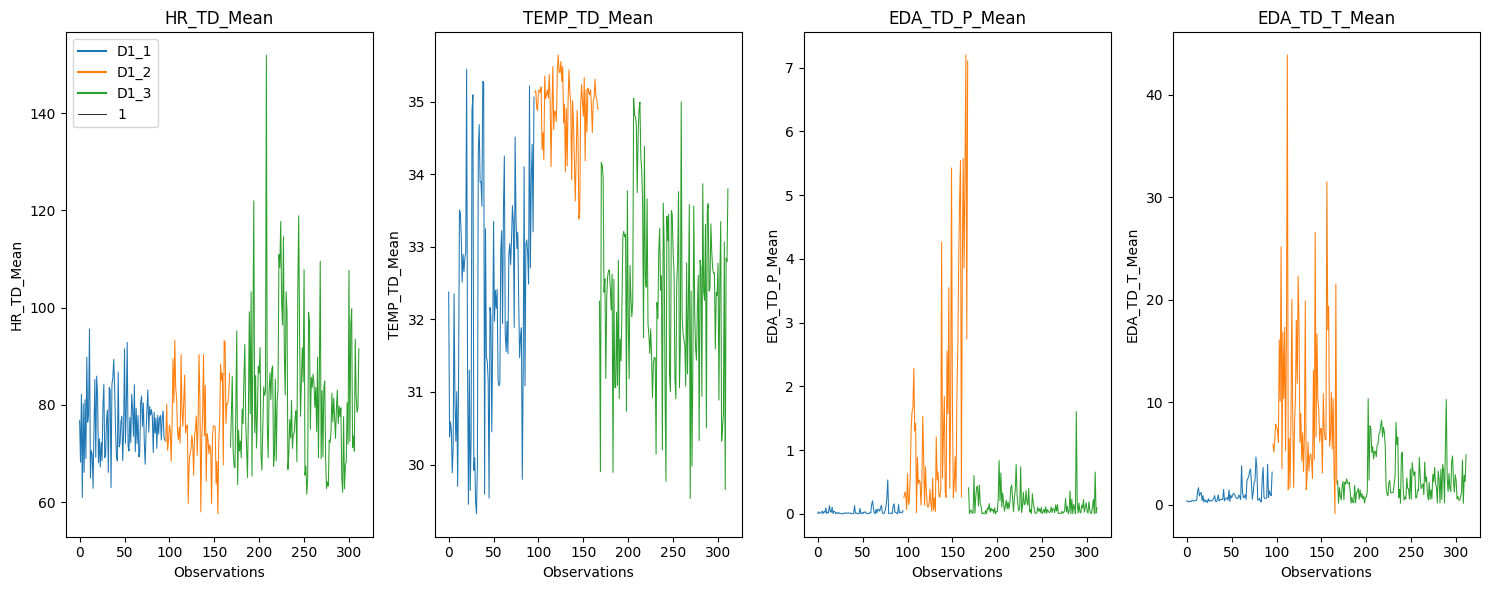

In [66]:
physiological_means = ['HR_TD_Mean', 'TEMP_TD_Mean', 'EDA_TD_P_Mean', 'EDA_TD_T_Mean']
df = data.copy()
# Merge Cohort D1_3, D1_4, D1_5 and D1_6 into D1_3
df['Cohort'] = df['Cohort'].apply(lambda x: 'D1_3' if x in ['D1_4', 'D1_5', 'D1_6'] else x)
# sort by cohort
df.sort_values(by='Cohort', inplace=True)
df.reset_index(drop=True, inplace=True)

# subplot for each physiological measure showing the development of the value with a line for each cohort and each phase, color by cohort
fig, axs = plt.subplots(1,4, figsize=(15,6))

for i, physiological_mean in enumerate(physiological_means):
    sns.lineplot(data=df, x=df.index, y=physiological_mean, hue='Cohort', ax=axs[i], linestyle='-', size=1)
    # sns.lineplot(data=df[df['Phase'] == 'phase2'], x=df[df['Phase'] == 'phase2'].index, y=physiological_mean, hue='Cohort', ax=axs[i], linestyle='-.', size=0.75)
    # sns.lineplot(data=df[df['Phase'] == 'phase3'], x=df[df['Phase'] == 'phase3'].index, y=physiological_mean, hue='Cohort', ax=axs[i], linestyle=':', size=1)
    # sns.lineplot(data=data[(data['Phase'] == 'phase1') & (data['Cohort'] == 'D1_2')], x=data[(data['Phase'] == 'phase1') & (data['Cohort'] == 'D1_2')].index, y=physiological_mean, hue='Cohort', ax=axs[i], linestyle='-.', size=0.5)
    # sns.lineplot(data=data[(data['Phase'] == 'phase1') & (data['Cohort'] == 'D1_3')], x=data[(data['Phase'] == 'phase1') & (data['Cohort'] == 'D1_3')].index, y=physiological_mean, hue='Cohort', ax=axs[i], linestyle=':', size=0.5)
    axs[i].set_title(physiological_mean)
    axs[i].set_ylabel(physiological_mean)
    axs[i].set_xlabel('Observations')
    # no legends
    axs[i].get_legend().remove()
axs[0].legend(loc='upper left')

plt.tight_layout()

plt.show()

In [6]:
data.head()

,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,HR_TD_Slope_max,...,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,78.663878,76.70,7.480043,67.25,92.48,23048.450,-1.091448,0.369955,-0.7300,0.9775,...,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0
1,76.540732,76.61,2.584756,69.82,82.33,23959.920,-0.245338,0.338732,-0.3600,0.1900,...,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0
2,78.173563,77.92,2.681255,72.22,82.80,20324.605,-0.615922,-0.233047,-0.6300,0.3575,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
3,83.073688,83.88,7.363598,69.42,96.12,24924.300,-0.866610,-0.046021,-0.4650,0.6500,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
4,72.281250,72.91,3.193762,64.95,79.98,23052.100,0.200401,-0.560948,-0.3725,0.3375,...,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0


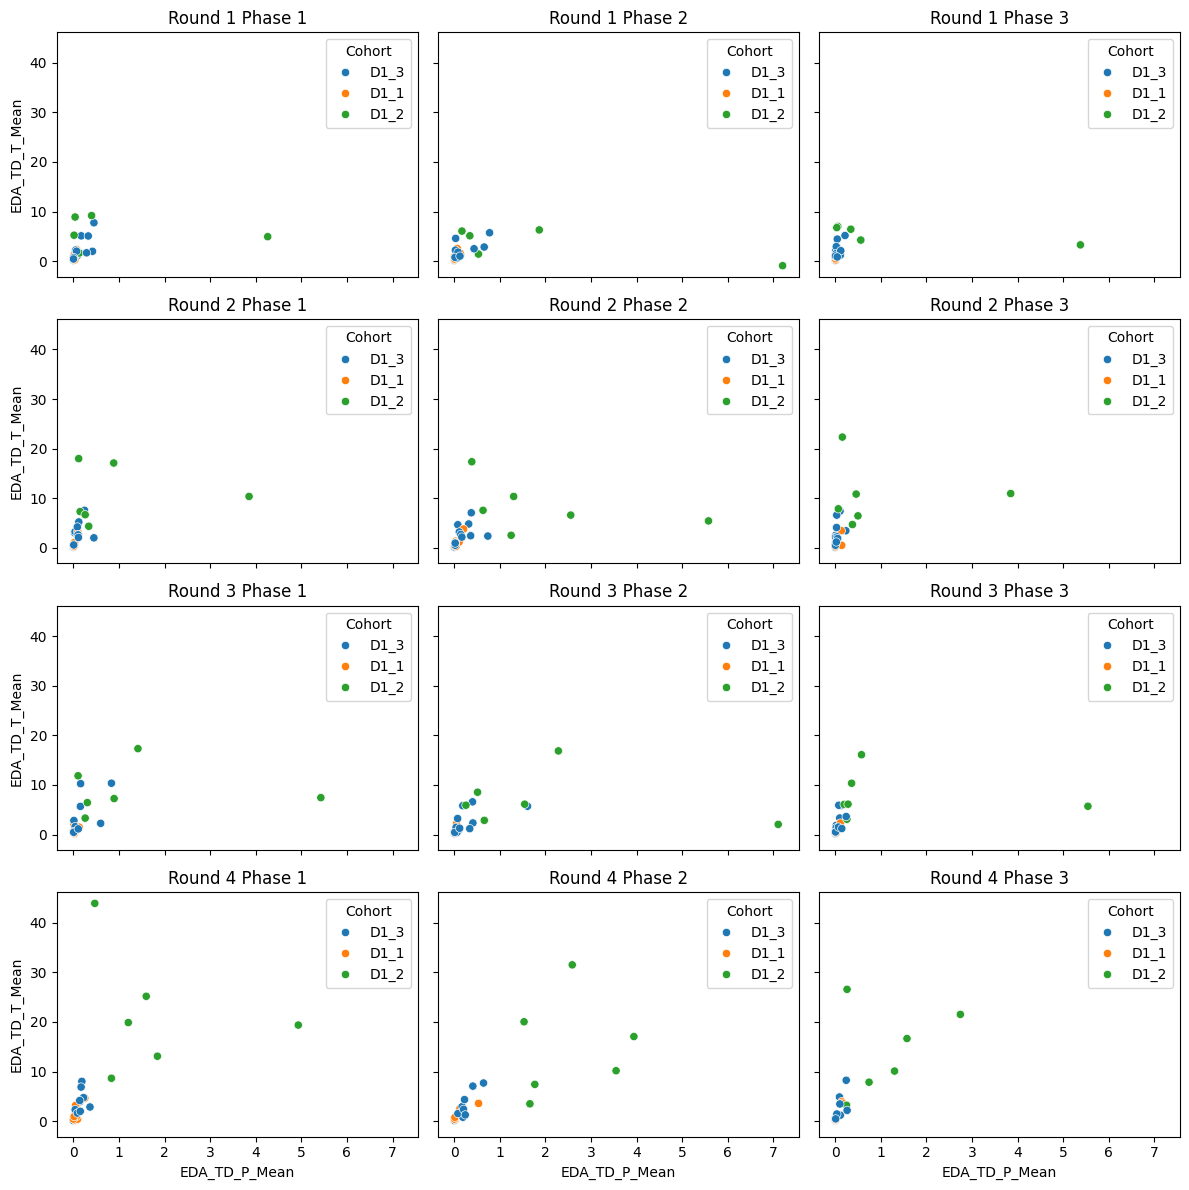

In [20]:
phys_measures = ['EDA_TD_P_Mean', 'EDA_TD_T_Mean']
fig, axs = plt.subplots(4,3, figsize=(12,12), sharey=True, sharex=True)

for i, round_num in enumerate(data['Round'].unique()):
    for j, phase_num in enumerate(data['Phase'].unique()):
        #sns.boxplot(x = 'value', y = 'variable', data = pd.melt(data[(data['Round'] == round_num) & (data['Phase'] == phase_num)][feelings]), ax=axs[i,j], hue='variable')
        sns.scatterplot(data = data[(data['Round'] == round_num) & (data['Phase'] == phase_num)], x="EDA_TD_P_Mean", y="EDA_TD_T_Mean", ax=axs[i,j], hue="Cohort")
        axs[i,j].set_title(f'Round {i+1} Phase {j+1}')
        axs[i,j].set_ylabel("EDA_TD_T_Mean")
        axs[i,j].set_xlabel("EDA_TD_P_Mean")
        # color by feeling


plt.tight_layout()

plt.show()

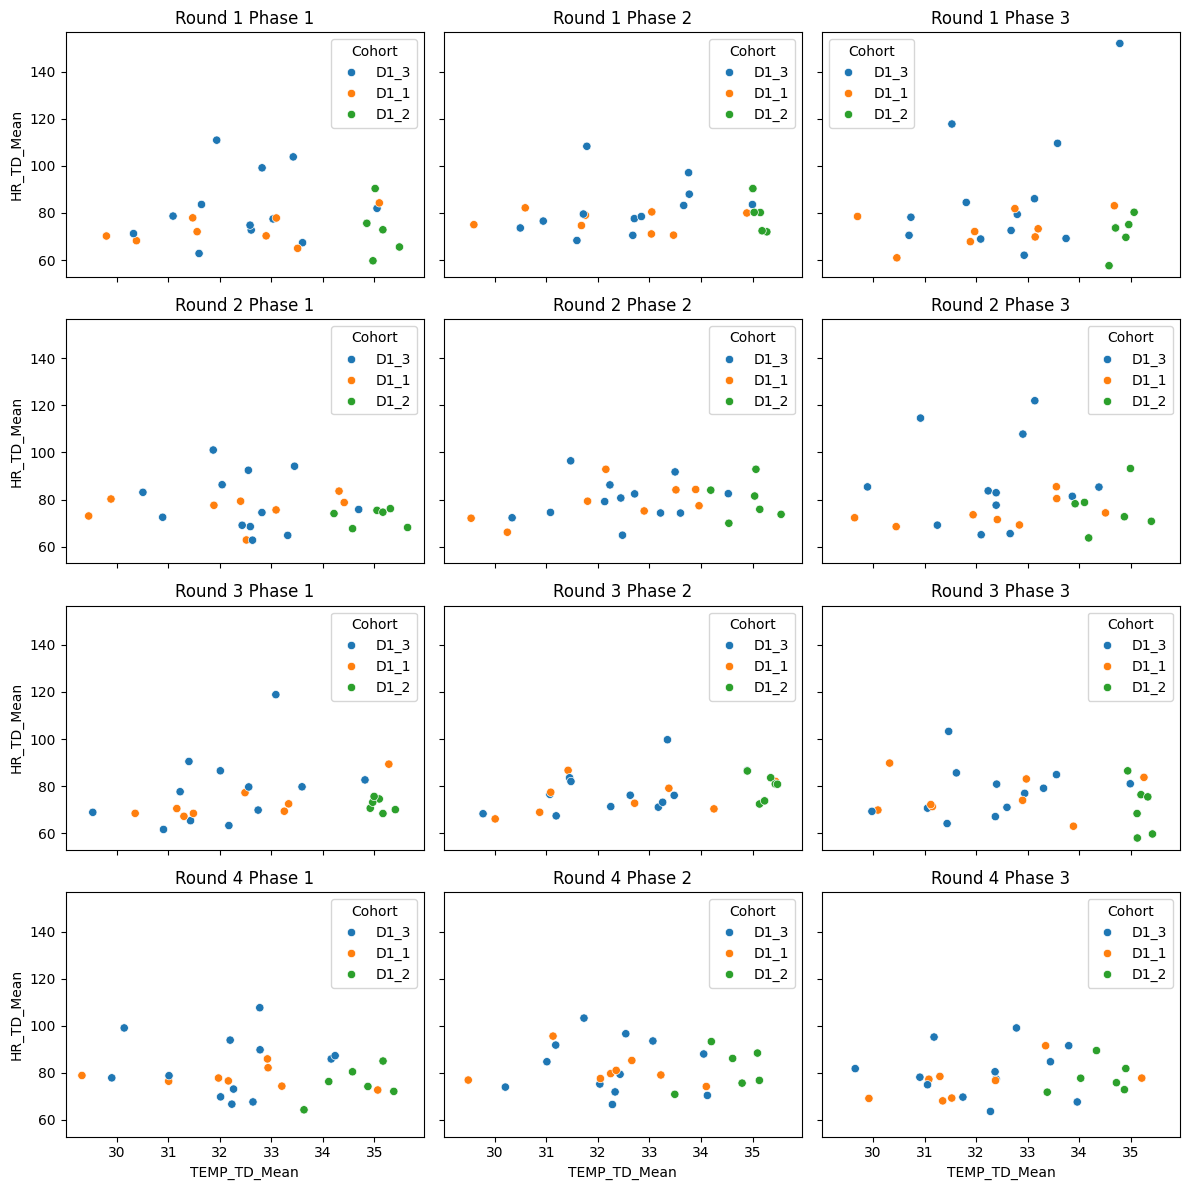

In [21]:
phys_measures = ['TEMP_TD_Mean', 'HR_TD_Mean']
fig, axs = plt.subplots(4,3, figsize=(12,12), sharey=True, sharex=True)

for i, round_num in enumerate(data['Round'].unique()):
    for j, phase_num in enumerate(data['Phase'].unique()):
        #sns.boxplot(x = 'value', y = 'variable', data = pd.melt(data[(data['Round'] == round_num) & (data['Phase'] == phase_num)][feelings]), ax=axs[i,j], hue='variable')
        sns.scatterplot(data = data[(data['Round'] == round_num) & (data['Phase'] == phase_num)], x="TEMP_TD_Mean", y="HR_TD_Mean", ax=axs[i,j], hue="Cohort")
        axs[i,j].set_title(f'Round {i+1} Phase {j+1}')
        axs[i,j].set_ylabel("HR_TD_Mean")
        axs[i,j].set_xlabel("TEMP_TD_Mean")
        # color by feeling


plt.tight_layout()

plt.show()

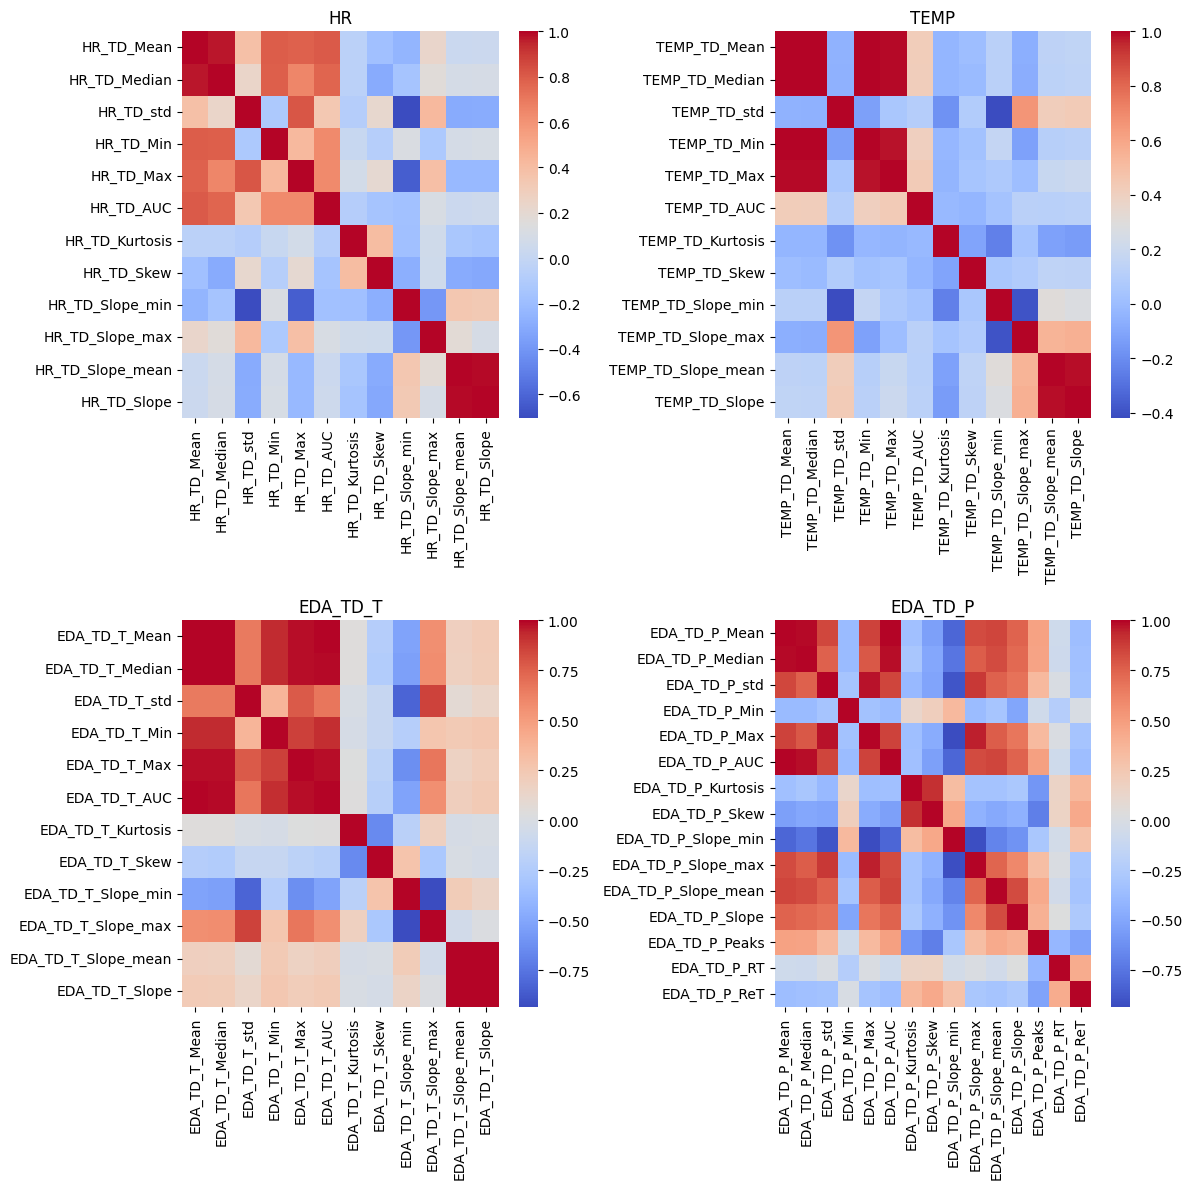

In [24]:
# columns that include HR
hr_cols = [col for col in data.columns if 'HR' in col]
# columns that include TEMP
temp_cols = [col for col in data.columns if 'TEMP' in col]
# columns that include EDA
eda_T_cols = [col for col in data.columns if 'EDA_TD_T' in col]
eda_P_cols = [col for col in data.columns if 'EDA_TD_P' in col]

# make a 2x2 subplot with correlation heatmap for HR, TEMP, EDA_T and EDA_P respectively
fig, axs = plt.subplots(2,2, figsize=(12,12))

sns.heatmap(data[hr_cols].corr(), ax=axs[0,0], cmap='coolwarm')
axs[0,0].set_title('HR')

sns.heatmap(data[temp_cols].corr(), ax=axs[0,1], cmap='coolwarm')
axs[0,1].set_title('TEMP')

sns.heatmap(data[eda_T_cols].corr(), ax=axs[1,0], cmap='coolwarm')
axs[1,0].set_title('EDA_TD_T')

sns.heatmap(data[eda_P_cols].corr(), ax=axs[1,1], cmap='coolwarm')
axs[1,1].set_title('EDA_TD_P')

plt.tight_layout()

plt.show()